## Video denoising com Robust PCA

In [2]:
#%pip install git+https://github.com/ShunChi100/RobustPCA

[Principal referência](https://arxiv.org/pdf/0912.3599)

[Implementação](https://github.com/ShunChi100/RobustPCA)

In [ ]:
from rpca import R_pca
import numpy as np
import matplotlib.pyplot as plt

In [18]:
Y = np.load('noisy.npy')

In [17]:
def plot_frame(frame, title):
    plt.figure()
    plt.imshow(frame, cmap='gray')
    plt.title(title)
    # remove ticks
    plt.xticks([])
    plt.yticks([])
    plt.show()

O Robust PCA é pesado. Vamos testar com apenas 1 frame.

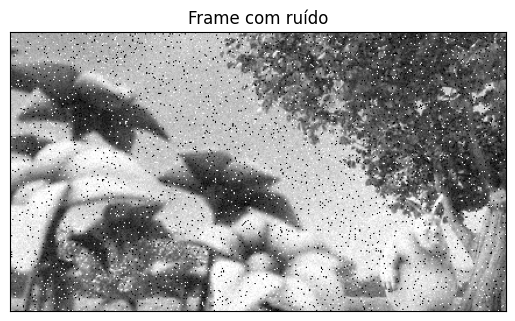

In [21]:
frame = Y[0]
plot_frame(frame, 'Frame com ruído')

Vamos agora aplicar o Robust PCA. Lembrando que a ideia é considerar o frame do vídeo como uma matriz $M$,
e obter
$$M = L + S,$$
onde $L$ é uma matriz low-rank e $S$ é uma matriz esparsa.

Espera-se que $S$ traga o ruído da imagem e $L$ seja uma boa aproximação sem ruído do frame original.

In [26]:
rpca = R_pca(frame)
L, S = rpca.fit(max_iter=1000, iter_print=100)

iteration: 1, error: 16.349094041947975
iteration: 100, error: 0.01746552003652588
iteration: 200, error: 0.02111752364720397
iteration: 300, error: 0.030593706703759292
iteration: 400, error: 0.038639625066934385
iteration: 500, error: 0.054420281074951296
iteration: 600, error: 0.2296869949417447
iteration: 700, error: 0.09076307707736021
iteration: 800, error: 0.06485461338037117
iteration: 900, error: 0.06484618462075026
iteration: 1000, error: 0.04354672570121348


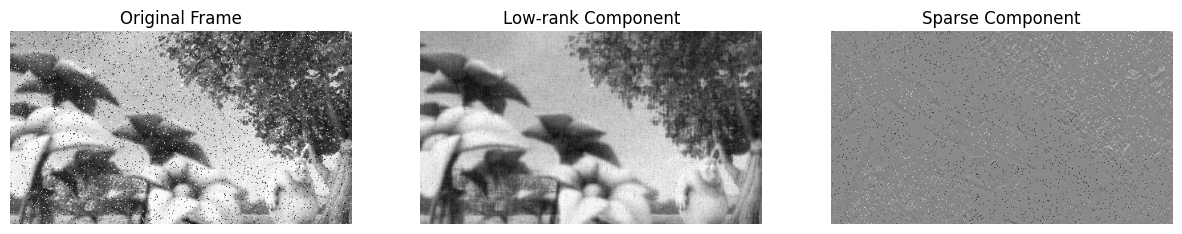

In [27]:
# plot original frame, L and S, side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(frame, cmap='gray')
axs[0].set_title('Original Frame')
axs[0].axis('off')
axs[1].imshow(L, cmap='gray')
axs[1].set_title('Low-rank Component')
axs[1].axis('off')
axs[2].imshow(S, cmap='gray')
axs[2].set_title('Sparse Component')
axs[2].axis('off')
plt.show()

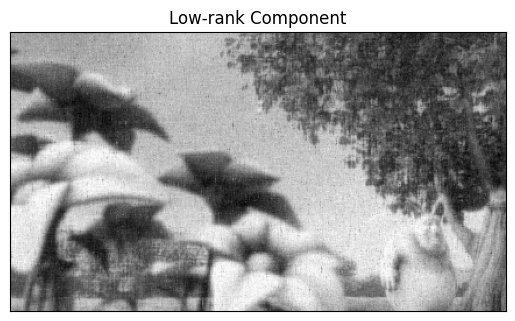

In [28]:
plot_frame(L, 'Low-rank Component')

O experimento foi um sucesso parcial.
Detalhes da imagem original foram perdidos,
porém a matriz $S$ de fato conseguiu isolar boa parte do ruído.